In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
df = pd.read_csv("amazon.csv")

In [3]:
df.sample(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
856,B08D64C9FN,Ant Esports GM320 RGB Optical Wired Gaming Mou...,Computers&Accessories|Accessories&Peripherals|...,₹575,"₹2,799",79%,4.2,"8,537",8 programmable buttons & Fire Button - support...,"AGXE2OEXIRBIE4WCKGQYVF4ZY5OQ,AE76DJPCEWHN2OTAI...","Sthith,Bhagwan Patil,Abhisekh,Murtaza Chhatriw...","RO0S1HB5CYIZ9,R1D7LUGU7FIF6R,R5VZWTCWXT2WY,R33...",It is kinda heavy and i suggest u should use a...,It's really good but it has alot of weight to ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ant-Esports-GM320-Progra...
153,B07YTNKVJQ,MI Xiaomi USB Type C HYperCharge Cable 6A 100c...,Computers&Accessories|Accessories&Peripherals|...,₹499,"₹1,299",62%,4.3,"30,411",Supports 120W Fast Charging|High Quality Design,"AHW6E5LQ2BDYOIVLAJGDH45J5V5Q,AF74RSGCHPZITVFSZ...","Pavan A H,Jayesh bagad,Shridhar,rajendran,karu...","R2X090D1YHACKR,R32ZCIH9AFNJ60,R3N57EVVG0EHAF,R...","Worth for money - suitable for Android auto,Go...",Worth for money - suitable for Android auto......,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Xiaomi-HyperCharge-Cable...
855,B07L9FW9GF,"Zebronics Zeb-Power Wired USB Mouse, 3-Button,...",Computers&Accessories|Accessories&Peripherals|...,₹149,₹249,40%,4.0,"5,057",If you’re looking at compact and stylish desig...,"AG65C34LATM4J3ZFKJJPDNISZKUQ,AG76GICZHJGA7YVN4...","zain,Deepak,VIMAL,Shiv Sagar,Tamil selvan,Rake...","R2JCUKBR0BQ8ES,RNVX0V6SJF3CP,RW5MJG9LTX6QD,R37...","Good product with less money,At this price ok ...",I love zebronics company the quality is really...,https://m.media-amazon.com/images/I/31aJNyKmGH...,https://www.amazon.in/Zebronics-Zeb-Power-Wire...


In [4]:
# Q1 What is the average rating for each product category

In [5]:
# converting all data in rating column into numeric 
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
# Group by 'category' and calculate the mean of 'rating'
avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

avg_rating_by_category

,category,rating
0,Car&Motorbike|CarAccessories|InteriorAccessori...,3.800000
1,Computers&Accessories|Accessories&Peripherals|...,4.150000
2,Computers&Accessories|Accessories&Peripherals|...,3.500000
3,Computers&Accessories|Accessories&Peripherals|...,3.600000
4,Computers&Accessories|Accessories&Peripherals|...,4.050000
...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.250000
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.150000
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.300000
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,4.133333


In [6]:
# Q2 What are the top rating_count products by category ?

In [7]:
# Convert the 'rating_count' column to numeric
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float).fillna(0).astype(int)
# Sort the DataFrame by 'category' and 'rating_count'
df_sorted = df.sort_values(by=['category', 'rating_count'], ascending=[True, False])

# Get the top products by category
top_products_by_category = df_sorted.groupby('category').head(1).reset_index(drop=True)


top_products_by_category[['category', 'product_name', 'rating_count']]


,category,product_name,rating_count
0,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,1118
1,Computers&Accessories|Accessories&Peripherals|...,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",4426
2,Computers&Accessories|Accessories&Peripherals|...,Hp Wired On Ear Headphones With Mic With 3.5 M...,7222
3,Computers&Accessories|Accessories&Peripherals|...,JBL Commercial CSLM20B Auxiliary Omnidirection...,14969
4,Computers&Accessories|Accessories&Peripherals|...,Zebronics Zeb Wonderbar 10 USB Powered 2.0 Com...,7352
...,...,...,...
206,OfficeProducts|OfficePaperProducts|Paper|Stati...,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,5792
207,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pilot Frixion Clicker Roller Pen (Blue), (9000...",6199
208,OfficeProducts|OfficePaperProducts|Paper|Stati...,Parker Classic Gold Gold Trim Ball Pen,5719
209,OfficeProducts|OfficePaperProducts|Paper|Stati...,"Pentonic Multicolor Ball Point Pen, Pack of 10",4308


In [18]:
# Q3 What is the distribution of discounted prices vs. actual prices

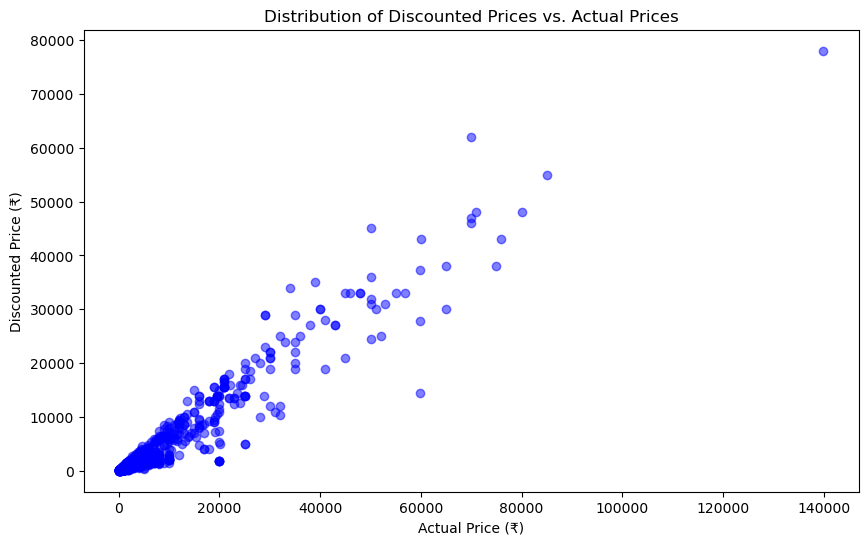

In [22]:


# Convert prices to numeric
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['actual_price'], df['discounted_price'], color='blue', alpha=0.5)
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.title('Distribution of Discounted Prices vs. Actual Prices')
plt.show()


In [24]:
# Q4 How does the average discount percentage vary across categories ?

In [42]:
# Convert the 'discount_percentage' column to numeric
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '').astype(float)


# Group by 'category' and calculate the mean of 'discount_percentage'
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()

# Print the average discount percentages
print(avg_discount_by_category)


                                              category  discount_percentage
0    Car&Motorbike|CarAccessories|InteriorAccessori...                 42.0
1    Computers&Accessories|Accessories&Peripherals|...                 78.5
2    Computers&Accessories|Accessories&Peripherals|...                 35.0
3    Computers&Accessories|Accessories&Peripherals|...                 56.5
4    Computers&Accessories|Accessories&Peripherals|...                 46.5
..                                                 ...                  ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...                  0.0
207  OfficeProducts|OfficePaperProducts|Paper|Stati...                  5.0
208  OfficeProducts|OfficePaperProducts|Paper|Stati...                 17.5
209  OfficeProducts|OfficePaperProducts|Paper|Stati...                 13.0
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...                  0.0

[211 rows x 2 columns]


In [30]:
# Q5 What are the most popular product names ?

In [34]:
# Convert the 'rating_count' column to numeric
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(int)

# Sort the DataFrame by 'rating_count'
df_sorted = df.sort_values(by='rating_count', ascending=False)

# Get the top products
top_products = df_sorted[['product_name', 'rating_count']].head(10)

# Print the top products
print("\nMost Popular Product Names:")
print(top_products)



Most Popular Product Names:
                                          product_name  rating_count
12   AmazonBasics Flexible Premium HDMI Cable (Blac...        426973
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...        426973
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...        426973
684  AmazonBasics Flexible Premium HDMI Cable (Blac...        426972
400  boAt Bassheads 100 in Ear Wired Earphones with...        363713
352  boAt Bassheads 100 in Ear Wired Earphones with...        363713
584  boAt BassHeads 100 in-Ear Wired Headphones wit...        363711
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...        313836
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...        313836
473  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...        313832


In [44]:
# Q6 What are the most popular product keywords

In [50]:
import pandas as pd

# Combine all product names into a single string
all_product_names = ' '.join(df['product_name'])

# Tokenize the product names
tokens = re.findall(r'\b\w+\b', all_product_names.lower())

# Count the frequency of each token
token_counts = Counter(tokens)

# Get the most common keywords
most_common_keywords = token_counts.most_common(10)

# Print the most common keywords
print("\nMost Popular Product Keywords:")
for keyword, count in most_common_keywords:
    print(f"{keyword}: {count}")



Most Popular Product Keywords:
with: 752
for: 674
black: 530
usb: 417
cable: 414
1: 413
and: 331
c: 289
3: 275
2: 267


In [54]:
# Q7  What are the most popular product reviews? 

In [58]:

# Convert the 'rating_count' column to string, remove commas, and convert to numeric
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(int)

# Sort the DataFrame by 'rating_count'
df_sorted_reviews = df.sort_values(by='rating_count', ascending=False)

# Get the top reviews
top_reviews = df_sorted_reviews[['product_name', 'review_title', 'review_content', 'rating_count']].head(10)

# Print the top reviews

top_reviews


,product_name,review_title,review_content,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426973
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,"It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,426972
400,boAt Bassheads 100 in Ear Wired Earphones with...,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363713
352,boAt Bassheads 100 in Ear Wired Earphones with...,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363713
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,"Best value for money,HEAD PHONE POUCH NOT RECE...",The sound quality of this earphone are really ...,363711
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313836
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313836
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...","Best phone for below normal use,Good mobile fo...",If you want a smart phone for just the use of ...,313832


In [60]:
# Q8 What is the correlation between discounted_price and rating

In [68]:

# Convert the 'discounted_price' column to string, remove currency symbols, and convert to numeric
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

# Convert the 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Calculate the correlation
correlation = df['discounted_price'].corr(df['rating'])

# Print the correlation
print("\nCorrelation Between Discounted Price and Rating:")
print(correlation)



Correlation Between Discounted Price and Rating:
0.12033741712288538


In [70]:
# Q9 What are the Top 5 categories based on the highest ratings ?

In [73]:

# Calculate the average rating for each category
avg_rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Sort the categories by average rating
top_categories = avg_rating_by_category.sort_values(by='rating', ascending=False).head(5)

# Print the top categories
print("\nTop 5 Categories Based on Highest Ratings:")
print(top_categories)



Top 5 Categories Based on Highest Ratings:
                                              category  rating
57                       Computers&Accessories|Tablets     4.6
48   Computers&Accessories|NetworkingDevices|Networ...     4.5
62    Electronics|Cameras&Photography|Accessories|Film     4.5
81   Electronics|HomeAudio|MediaStreamingDevices|St...     4.5
196  OfficeProducts|OfficeElectronics|Calculators|B...     4.5


In [75]:
# Q10 Identify any potential areas for improvement or optimization based on the data analysis.

In [ ]:


#1. **Product Quality**: Focus on improving products with lower ratings and negative reviews.
#2. **Pricing Strategy**: Optimize discount strategies and ensure competitive pricing.
#3. **High-Rating Categories**: Invest more in categories with higher average ratings.
#4. **Marketing**: Promote products with high ratings and positive reviews.
#5. **Customer Feedback**: Collect and act on detailed customer feedback.
#6. **Inventory Management**: Ensure popular products are always in stock and manage low-demand products effectively.
#7. **User Experience**: Improve website navigation and enhance product descriptions.

These steps can help optimize operations, improve customer satisfaction, and drive higher sales.